# Working notebook 4

# **Goals:**

* Discover key attributes that drive and have a high correlation with home value.

* Use those attributes to develop a machine learning model to predict home value.

    * Carefully select features that will prevent data leakage. 


## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import model as m
import explore as e

# Acquire:

In [2]:
# acquire telco data 
df = w.get_zillow_data()

* Data acquire from Codeup Database 11/17/22

* It contained  52441 rows and 10 columns before cleaning

* Each row represents a single family household:
    * properties from 2017 with current transactions
    * located in the Californian counties of 'Los Angeles' or 'Orange'or 'Ventura'

* Each column represents a feature related to the single family residential.

###                                                        <h1><center>Data Dictionary</center></h1>     


|Feature          | Description|
| :---------------: | :---------------------------------- |
| home_value (target) | The total tax assessed value of the parcel  |
| squarefeet:  | Calculated total finished living area of the home |
| bathrooms:   |  Number of bathrooms in home including fractional bathrooms |
| bedrooms: | Number of bedrooms in home  |
| yearbuilt:  |  The Year the principal residence was built   |
| fireplace: | fireplace on property (if any = 1) |
| deck:  | deck on property (if any = 1) |
| pool:  | pool on property (if any = 1) |
| garage: | garage on property (if any = 1) |
| county: | FIPS code for californian counties: 6111 Ventura County, 6059  Orange County, 6037 Los Angeles County |
| home_age: | The age of the home in 2017   |
|optional_features: |If a home has any of the follwing: fireplace, deck, pool, garage it is noted as 1   |
|additional features: | 	Encoded and values for categorical data

# Prepare:

In [3]:
# prepare data 
df = w.zillow_prep(df)

In [4]:
# split data: train, validate and test
train, validate, test = w.split_data(df)

prepare actions:
* After the follwing steps I retained 95.9% of original data:
    * Outliers were removed
    (to better fit the definition of Single Family Property):
    
        * Beds above 6 
        * Baths above 6 
        * Home values above 1_750_000
        * Rows with both 0 beds and 0 baths 
        
    * For the following features it was assumed null values meant the structure did not exist on property:
        * fireplace (45198)
        * deck (52052)
        * pool (41345)
        * garage (34425)
            
    * The following null values were dropped:
        * home_value (1)
        * squarefeet (82)
        * yearbuilt (116)

* Encoded categorical variables
* Split data into train, validate and test 
    * Approximately: train 56%, validate 24%, test 20%
  


# Looking at the data

In [5]:
train.head(10)

,home_value,squarefeet,bathrooms,bedrooms,yearbuilt,fireplace,deck,pool,garage,county,home_age,optional_features,los_angeles_county,orange_county,ventura_county
32899,346258.0,1026.0,1.0,2.0,1924.0,0.0,0.0,0.0,0.0,6037.0,93.0,0,1,0,0
4511,520000.0,1728.0,2.0,3.0,1987.0,0.0,0.0,0.0,0.0,6037.0,30.0,0,1,0,0
29470,217589.0,1840.0,2.0,4.0,1973.0,0.0,0.0,0.0,1.0,6059.0,44.0,0,0,1,0
15398,210507.0,2581.0,3.0,4.0,1994.0,0.0,0.0,1.0,0.0,6037.0,23.0,1,1,0,0
14156,294263.0,902.0,2.0,2.0,1950.0,0.0,0.0,0.0,0.0,6037.0,67.0,0,1,0,0
32788,241475.0,1719.0,2.5,3.0,1992.0,1.0,0.0,0.0,1.0,6111.0,25.0,1,0,0,1
19187,108271.0,2018.0,3.0,3.0,1960.0,0.0,0.0,1.0,0.0,6037.0,57.0,1,1,0,0
29240,243917.0,2542.0,3.0,3.0,1955.0,0.0,0.0,0.0,0.0,6037.0,62.0,0,1,0,0
24385,482506.0,1668.0,2.0,3.0,1979.0,0.0,0.0,1.0,1.0,6059.0,38.0,1,0,1,0
46165,413000.0,1351.0,2.0,3.0,1954.0,0.0,0.0,0.0,0.0,6037.0,63.0,0,1,0,0


# Data Summary

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
home_value,28159.0,435017.576015,332865.944266,3254.0,187537.5,362951.0,583900.5,1750000.0
squarefeet,28159.0,1832.225576,803.292556,300.0,1256.0,1633.0,2227.0,8251.0
bathrooms,28159.0,2.228506,0.884596,1.0,2.0,2.0,3.0,6.0
bedrooms,28159.0,3.273483,0.886781,1.0,3.0,3.0,4.0,6.0
yearbuilt,28159.0,1963.118719,22.663952,1878.0,1950.0,1960.0,1978.0,2015.0
fireplace,28159.0,0.141376,0.348415,0.0,0.0,0.0,0.0,1.0
deck,28159.0,0.006925,0.082929,0.0,0.0,0.0,0.0,1.0
pool,28159.0,0.204020,0.402991,0.0,0.0,0.0,0.0,1.0
garage,28159.0,0.344259,0.475135,0.0,0.0,0.0,1.0,1.0
county,28159.0,6049.246031,21.220257,6037.0,6037.0,6037.0,6059.0,6111.0


# Explore:

## How do optional home features influence home value?

  * optional features refers to fireplace, garage, pool, and deck

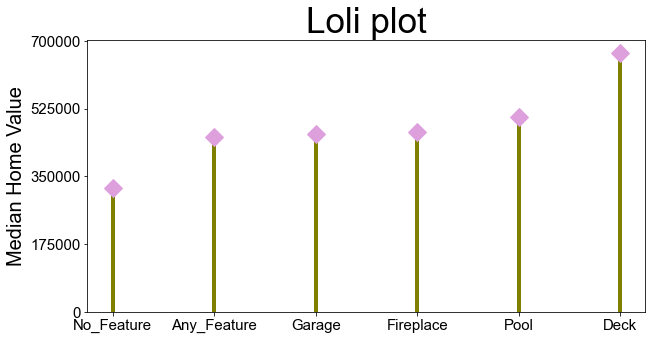

In [7]:
# obtain lolipop plot
e.lolipop_plot(train)

#### Homes with a deck have a higher average home value than any other feature. Homes with no optional home featues have the lowest average home value.

# Does more house equal more home value?


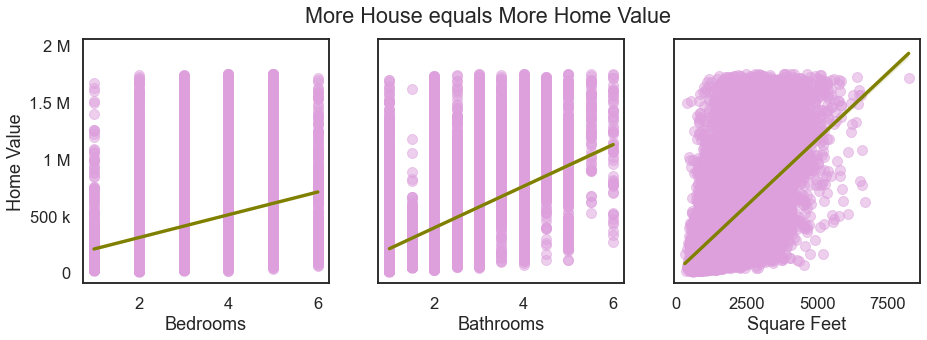

In [8]:
# obtain bed, bath and squarfeet graph
e.more_house(train)

#### It clear that more bedrooms , more bathrooms and more square feet space drives the home value up.

 # Does county make a difference in home value?
    FIPS     6111: Ventura County    6059: Orange County    6037: Los Angeles County

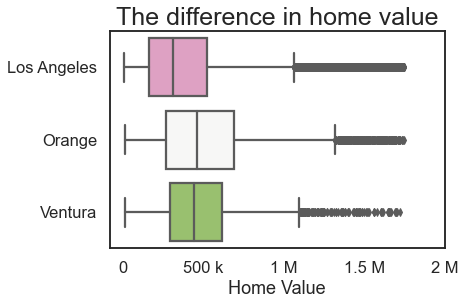

In [9]:
# obtain counties and home value box_plot
e.county_vs_homevalue(train)

* **It seems that different counties have a diffirent home value mean.**

**I will now conduct an anova test to test for a significant differences between the mean of the three different counties**

* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


$H_0$: There is  two or more counties that have the same home value mean. 

$H_a$: Mean home value of the 3 diffirent counties is not the same

In [10]:
e.anova_county_test(train)

t-stat 391.4815270923903
p-value 2.0078897820183972e-168


The p-value is less than alpha. There is evidence to support that the three counties have diffirent home value mean. Based on this statistical finding I believe that county location is a driver of home value. Adding an encoded version of this feature to the model will likely increase the model's accuracy.

# Is home age a driver of home value?

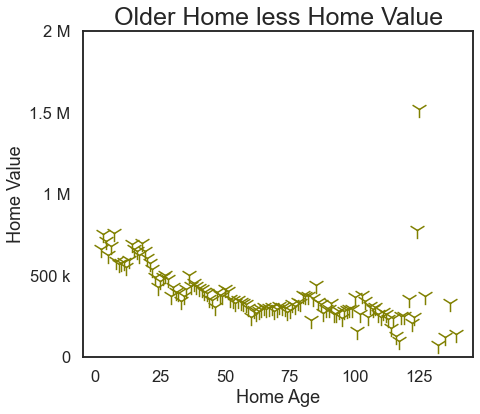

In [14]:
# obtain home age vs home value scatterplot
e.home_scatterplot(train)

# Exploration Summary

* A
* B
* C

# Features that will be included in my model

* **A**  has a significant statistical relationship to 
* **B**  has a significant statistical relationship to 
* **C**  has a significant statistical relationship to 


# Features that will be not included in my model

* **D** did not ..
* **Other features** have ..

# Modeling:

## Scaling

# Prepare  data for models

In [ ]:
# prepare data for modeling
X_train, y_train, X_validate, y_validate, X_test, y_test = m.model_data_prep(train, validate, test)

# Model

# OLS

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:


#scores.loc[len(scores.index)] = [key, f, RMSE_baseline, RMSE, R2, RMSE_val, R2_val, diff]

In [ ]:
# set up dataframe for predictions, add actual values
train_pred = pd.DataFrame({
    'actual': train.home_value
}) 
validate_pred = pd.DataFrame({
    'actual': validate.home_value
}) 

## Baseline

In [ ]:
# add a baseline model
train_pred['baseline_mean'] = train.home_value.mean()
validate_pred['baseline_mean'] = validate.home_value.mean()

train_pred['baseline_median'] = train.home_value.median()
validate_pred['baseline_median'] = validate.home_value.median()

In [ ]:
train.columns

# custom

In [ ]:
custom = ['squarefeet','bathrooms','bedrooms','yearbuilt','pool','orange_county','optional_features']

In [ ]:

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[custom], y_train)
# 3. use the thing (make predictions)

train_pred['CUS_Model'] = lm.predict(X_train[custom])
validate_pred['CUS_Model'] = lm.predict(X_validate[custom])

# OLS

In [ ]:

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train, y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model'] = lm.predict(X_train)
validate_pred['OLS_Model'] = lm.predict(X_validate)

In [ ]:
train_pred

In [ ]:
validate_pred

## Using Kbest 7 features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 7 features
f_selector = SelectKBest(f_regression, k=7)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()


In [ ]:
X_train[f_feature]

In [ ]:
X_train.columns.to_list()

In [ ]:
# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_f7'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_f7'] = lm.predict(X_validate[f_feature])

In [ ]:
train_pred

In [ ]:
# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_cus'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_cus'] = lm.predict(X_validate[f_feature])

# Using Kbest 4 features

In [ ]:
# parameters: f_regression stats test, give me 4 features
f_selector = SelectKBest(f_regression, k=4)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_f4'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_f4'] = lm.predict(X_validate[f_feature])

In [ ]:
X_train[f_feature]

In [ ]:
train_pred

# Using Kbest 3 features

In [ ]:
# parameters: f_regression stats test, give me 3 features
f_selector = SelectKBest(f_regression, k=3)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_f3'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_f3'] = lm.predict(X_validate[f_feature])

In [ ]:
X_train[f_feature]

In [ ]:
train_pred

# OLS_ RFE  features = 7  

In [ ]:
columns = X_train.columns.to_list()

In [ ]:
X_train

In [ ]:
from sklearn.feature_selection import RFE
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=7)
rfe.fit(X_train, y_train)
print('selected top 7 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe7'] = lm.predict(X_train_rfe)

In [ ]:
# 3. Make predictions


X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe7'] = lm.predict(X_validate_rfe)

In [ ]:
train_pred

# OLS_RFE 4 features

In [ ]:
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=4)
rfe.fit(X_train, y_train)
print('selected top 4 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe4'] = lm.predict(X_train_rfe)
X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe4'] = lm.predict(X_validate_rfe)

# OLS_RFE 3 features

In [ ]:
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=3)
rfe.fit(X_train, y_train)
print('selected top 3 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe3'] = lm.predict(X_train_rfe)
X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe3'] = lm.predict(X_validate_rfe)

# OLS_RFE 2 features

In [ ]:
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=2)
rfe.fit(X_train, y_train)
print('selected top 2 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe2'] = lm.predict(X_train_rfe)
X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe2'] = lm.predict(X_validate_rfe)

In [ ]:
train_pred

# Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 2

In [ ]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['poly_d2'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['poly_d2'] = lm.predict(X_validate_poly)


# Degree 2 interactions ONLY

In [ ]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['Ipoly_d2'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['Ipoly_d2'] = lm.predict(X_validate_poly)

In [ ]:
validate_pred

# Degree 3

In [ ]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['poly_d3'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['poly_d3'] = lm.predict(X_validate_poly)

# DEGREE 3 Interactions Only

In [ ]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['Ipoly_d3'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['Ipoly_d3'] = lm.predict(X_validate_poly)

# Degree 4

In [ ]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['poly_d4'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['poly_d4'] = lm.predict(X_validate_poly)

# DEGREE 4 interaction Only

In [ ]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['Ipoly_d4'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['Ipoly_d4'] = lm.predict(X_validate_poly)

# Evaluate Models

In [ ]:
train_pred

In [ ]:
def evaluate_metrics(df, col,actual):
    MSE = mean_squared_error(actual, df[col])
    SSE = MSE * len(df)
    RMSE = MSE ** .5
    ESS = ((df[col] - actual.mean())**2).sum()
    TSS = ESS + SSE
    R2 = explained_variance_score(actual, df[col])
    return MSE, SSE, RMSE,ESS, TSS,R2

In [ ]:
col = train_pred.columns.to_list()

In [ ]:
from sklearn.metrics import mean_squared_error,explained_variance_score
metric_df = pd.DataFrame(columns =['model','MSE','SSE','RMSE','ESS','TSS','R2'])
for i in col:
    MSE,SSE, RMSE, ESS, TSS, R2 = evaluate_metrics(train_pred, i , y_train)
    # sklearn.metrics.explained_variance_score

    metric_df= metric_df.append({
                    'model': i,
                    'MSE':MSE,
                     'SSE':SSE,
                     'RMSE':RMSE,
                     'ESS':ESS,
                     'TSS':TSS,
                     'R2':R2},ignore_index=True)
    

In [ ]:
metric_df

In [ ]:
metric_df[['model','RMSE','R2']]


In [ ]:
metric_df[['model','RMSE','R2']].sort_values(by='R2',ascending=False)

In [ ]:
metric_val['diff_RMSE']= metric_val[['RMSE']]- metric_df[['RMSE']]

In [ ]:
metric_val['diff_R2']= metric_val[['R2']]- metric_df[['R2']]

In [ ]:
# train - validate
1-200_000/250_000

In [ ]:
metric_val['%diff_RMSE']= 1-(metric_df[['RMSE']]/(metric_val[['RMSE']]+.000000000001))

In [ ]:
metric_val[['model','RMSE','R2','diff_R2','diff_RMSE','%diff_RMSE']].sort_values(by='%diff_RMSE',ascending=False)

In [ ]:
col = validate_pred.columns.to_list()
metric_val = pd.DataFrame(columns =['model','MSE','SSE','RMSE','ESS','TSS','R2'])
for i in col:
    MSE,SSE, RMSE, ESS, TSS, R2 = evaluate_metrics(validate_pred, i , y_validate)
    metric_val= metric_val.append({
                    'model': i,
                    'MSE':MSE,
                     'SSE':SSE,
                     'RMSE':RMSE,
                     'ESS':ESS,
                     'TSS':TSS,
                     'R2':R2},ignore_index=True)
    


In [ ]:
metric_val[['model','RMSE','R2']].sort_values(by='R2',ascending=False)

In [ ]:
validate_pred

In [ ]:
df['yhat_baseline'] = df['y'].mean()
df['yhat'] = ols_model.predict(df[['x']])

df['residual'] = df['yhat'] - df['y']
df['residual_baseline'] = df['yhat_baseline'] - df['y']

df['residual^2'] = df.residual ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

In [ ]:
def plot_residuals(y, yhat,df):
    '''
    plot_residuals takis in acutal value of target y and predicted value and returns a scatter plot of reiduals.
    y: targets acutal value
    yhat: predicted value or target
    '''
    # calculate residauals
    residuals = y - df[yhat]
    
    # create scatter plot
    plt.scatter(x=y, y=residuals)

    # create labels for axis and title
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')

    # show plot
    plt.show()

In [ ]:
col = train_pred.columns.to_list()
col

In [ ]:
for i in col:  
    print(i)
    plot_residuals(y_train, i, train_pred)





In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def regression_errors(actual, yhat,df):

    residual = actual - df[yhat]
    
    mse = mean_squared_error(actual, df[yhat])
    sse = (residual **2).sum()
    rmse = sqrt(mse)
    tss = ((actual - df[yhat].mean()) ** 2).sum()
    ess = ((df[yhat] - actual.mean()) ** 2).sum()
    print(f""" 
    MSE: {round(mse,2)}
    SSE: {round(sse,2)}
    RMSE: {round(rmse,2)}
    TSS: {round(tss,2)}
    ESS: {round(ess,2)}
    """)

In [ ]:
for i in col:  
    print(i)
    regression_errors(y_train, i, train_pred)



* metric

In [ ]:
# prep data for modeling
x_train,y_train,x_validate,y_validate, x_test, y_test = m.model_prep(train,validate,test)

**The ....** 

# Comparing Models

* All ....

# Model on Test data

In [ ]:
m.get_logit_model(x_train,y_train,x_test,y_test, True)

## Modeling Summary

* A
* B

# Conclusion

## Exploration



* A
* B

## Modeling

**The final model performed....**

## Recommendations

* A
* B
* C

## Next Steps

* A
* B
* C